In [1]:
!pip install pandasql
!pip install SQLAlchemy==1.4.46

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=2337e4bcb22ec6229388eb88c3e7a55164eaef4f7efe03f1870ba98e818df00a
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.8 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.28
    Uninstalling SQLAlchemy-2.0.28:
      Successfully uninstalled SQLAlchemy-2.0.28
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.46 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import pandasql as pa


In [3]:
%%capture
!apt update
!pip install kaggle

In [4]:
#mounted drive directly
#3
mal=pd.read_csv("/content/drive/MyDrive/CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv",delimiter="|")
mal.head()

ts                 uid        id.orig_h  id.orig_p  \
0  1.525880e+09  CUmrqr4svHuSXJy5z7  192.168.100.103    51524.0   
1  1.525880e+09  CH98aB3s1kJeq6SFOc  192.168.100.103    56305.0   
2  1.525880e+09   C3GBTkINvXNjVGtN5  192.168.100.103    41101.0   
3  1.525880e+09   CDe43c1PtgynajGI6  192.168.100.103    60905.0   
4  1.525880e+09  CJaDcG3MZzvf1YVYI4  192.168.100.103    44301.0   

         id.resp_h  id.resp_p proto service  duration orig_bytes  ...  \
0   65.127.233.163       23.0   tcp       -  2.999051          0  ...   
1    63.150.16.171       23.0   tcp       -         -          -  ...   
2     111.40.23.49       23.0   tcp       -         -          -  ...   
3  131.174.215.147       23.0   tcp       -  2.998796          0  ...   
4      91.42.47.63       23.0   tcp       -         -          -  ...   

  local_resp missed_bytes history orig_pkts  orig_ip_bytes resp_pkts  \
0          -          0.0       S       3.0          180.0       0.0   
1          -          0.0       S       1.0           60.0       0.0   
2          -          0.0       S       1.0           60.0       0.0   
3          -          0.0       S       3.0          180.0       0.0   
4          -          0.0       S       1.0           60.0       0.0   

   resp_ip_bytes  tunnel_parents      label             detailed-label  
0            0.0               -  Malicious  PartOfAHorizontalPortScan  
1            0.0               -  Malicious  PartOfAHorizontalPortScan  
2            0.0               -  Malicious  PartOfAHorizontalPortScan  
3            0.0               -  Malicious  PartOfAHorizontalPortScan  
4            0.0               -  Malicious  PartOfAHorizontalPortScan  

[5 rows x 23 columns]

In [5]:
mal.rename(columns={ 'id.orig_h':'Source_IP', 'id.resp_h':'Destination_IP', 'id.orig_p':'Source_Port', 'id.resp_p':'Destination_Port', 'detailed-label':'detailed_label' },inplace=True)
mal.head()

ts                 uid        Source_IP  Source_Port  \
0  1.525880e+09  CUmrqr4svHuSXJy5z7  192.168.100.103      51524.0   
1  1.525880e+09  CH98aB3s1kJeq6SFOc  192.168.100.103      56305.0   
2  1.525880e+09   C3GBTkINvXNjVGtN5  192.168.100.103      41101.0   
3  1.525880e+09   CDe43c1PtgynajGI6  192.168.100.103      60905.0   
4  1.525880e+09  CJaDcG3MZzvf1YVYI4  192.168.100.103      44301.0   

    Destination_IP  Destination_Port proto service  duration orig_bytes  ...  \
0   65.127.233.163              23.0   tcp       -  2.999051          0  ...   
1    63.150.16.171              23.0   tcp       -         -          -  ...   
2     111.40.23.49              23.0   tcp       -         -          -  ...   
3  131.174.215.147              23.0   tcp       -  2.998796          0  ...   
4      91.42.47.63              23.0   tcp       -         -          -  ...   

  local_resp missed_bytes history orig_pkts  orig_ip_bytes resp_pkts  \
0          -          0.0       S       3.0          180.0       0.0   
1          -          0.0       S       1.0           60.0       0.0   
2          -          0.0       S       1.0           60.0       0.0   
3          -          0.0       S       3.0          180.0       0.0   
4          -          0.0       S       1.0           60.0       0.0   

   resp_ip_bytes  tunnel_parents      label             detailed_label  
0            0.0               -  Malicious  PartOfAHorizontalPortScan  
1            0.0               -  Malicious  PartOfAHorizontalPortScan  
2            0.0               -  Malicious  PartOfAHorizontalPortScan  
3            0.0               -  Malicious  PartOfAHorizontalPortScan  
4            0.0               -  Malicious  PartOfAHorizontalPortScan  

[5 rows x 23 columns]

In [6]:
mal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008748 entries, 0 to 1008747
Data columns (total 23 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   ts                1008748 non-null  float64
 1   uid               1008748 non-null  object 
 2   Source_IP         1008748 non-null  object 
 3   Source_Port       1008748 non-null  float64
 4   Destination_IP    1008748 non-null  object 
 5   Destination_Port  1008748 non-null  float64
 6   proto             1008748 non-null  object 
 7   service           1008748 non-null  object 
 8   duration          1008748 non-null  object 
 9   orig_bytes        1008748 non-null  object 
 10  resp_bytes        1008748 non-null  object 
 11  conn_state        1008748 non-null  object 
 12  local_orig        1008748 non-null  object 
 13  local_resp        1008748 non-null  object 
 14  missed_bytes      1008748 non-null  float64
 15  history           1008748 non-null  object 
 16  

In [7]:
#5
mal['Source_IP']==mal['Source_IP'].astype(str)
mal['Destination_IP']=mal['Destination_IP'].astype(str)
mal['Source_Port']=mal['Source_Port'].astype(str)
mal['Destination_Port']=mal['Destination_Port'].astype(str)
mal['detailed_label']=mal['detailed_label'].astype(str)

In [8]:
#6
mal[['orig_bytes', 'resp_bytes', 'duration']]=mal[['orig_bytes', 'resp_bytes', 'duration']].apply(pd.to_numeric, errors='coerce').fillna(0)

In [9]:
mal.dtypes

ts                  float64
uid                  object
Source_IP            object
Source_Port          object
Destination_IP       object
Destination_Port     object
proto                object
service              object
duration            float64
orig_bytes          float64
resp_bytes          float64
conn_state           object
local_orig           object
local_resp           object
missed_bytes        float64
history              object
orig_pkts           float64
orig_ip_bytes       float64
resp_pkts           float64
resp_ip_bytes       float64
tunnel_parents       object
label                object
detailed_label       object
dtype: object

In [10]:
mal.head(20)

ts                 uid        Source_IP Source_Port  \
0   1.525880e+09  CUmrqr4svHuSXJy5z7  192.168.100.103     51524.0   
1   1.525880e+09  CH98aB3s1kJeq6SFOc  192.168.100.103     56305.0   
2   1.525880e+09   C3GBTkINvXNjVGtN5  192.168.100.103     41101.0   
3   1.525880e+09   CDe43c1PtgynajGI6  192.168.100.103     60905.0   
4   1.525880e+09  CJaDcG3MZzvf1YVYI4  192.168.100.103     44301.0   
5   1.525880e+09  CMBrup3BLXivSp4Avc  192.168.100.103     50244.0   
6   1.525880e+09  CfHl9r3XMYtDQRrHnh  192.168.100.103     34243.0   
7   1.525880e+09  C7USrA15nFVkniMqC5  192.168.100.103     34840.0   
8   1.525880e+09   CDtZ4so7bHKpIeCmi  192.168.100.103     58525.0   
9   1.525880e+09   Cj9lm7amKnWiNDh9c  192.168.100.103     43849.0   
10  1.525880e+09  CgeVK21nm6PyVgJ4ah  192.168.100.103     40973.0   
11  1.525880e+09  CFXxTW19F3sluNEkJk  192.168.100.103     52259.0   
12  1.525880e+09  CRRl9U39PzvL3OiS61  192.168.100.103     42207.0   
13  1.525880e+09  C9hk4p2z9Y6AvlzLff  192.168.100.103     51524.0   
14  1.525880e+09  Cx7t1f1wqRES8kiTq6  192.168.100.103     40459.0   
15  1.525880e+09   C3AFse2JfKAgalsik  192.168.100.103     60905.0   
16  1.525880e+09   CdQJe43wv9ipLJklh  192.168.100.103     56305.0   
17  1.525880e+09  C3ajsm4byxMkPys9Wa  192.168.100.103     34243.0   
18  1.525880e+09  Cta8kR3Zfh09uPo77k  192.168.100.103     44301.0   
19  1.525880e+09  CRwLRg1TuvUDjEHuI5  192.168.100.103     39813.0   

     Destination_IP Destination_Port proto service  duration  orig_bytes  ...  \
0    65.127.233.163             23.0   tcp       -  2.999051         0.0  ...   
1     63.150.16.171             23.0   tcp       -  0.000000         0.0  ...   
2      111.40.23.49             23.0   tcp       -  0.000000         0.0  ...   
3   131.174.215.147             23.0   tcp       -  2.998796         0.0  ...   
4       91.42.47.63             23.0   tcp       -  0.000000         0.0  ...   
5   120.210.108.200             23.0   tcp       -  0.000000         0.0  ...   
6      147.7.65.203          49560.0   tcp       -  2.998804         0.0  ...   
7      145.164.35.6          21288.0   tcp       -  0.000000         0.0  ...   
8    177.75.151.125             23.0   tcp       -  0.000000         0.0  ...   
9     94.145.70.119           8080.0   tcp       -  0.000000         0.0  ...   
10   62.239.193.205           8080.0   tcp       -  0.000000         0.0  ...   
11  193.189.106.178             23.0   tcp       -  2.999300         0.0  ...   
12    10.169.219.98           8080.0   tcp       -  2.993548         0.0  ...   
13   65.127.233.163             23.0   tcp       -  0.000000         0.0  ...   
14  212.110.180.188             23.0   tcp       -  2.998807         0.0  ...   
15  131.174.215.147             23.0   tcp       -  0.000000         0.0  ...   
16    63.150.16.171             23.0   tcp       -  0.000000         0.0  ...   
17     147.7.65.203          49560.0   tcp       -  0.000000         0.0  ...   
18      91.42.47.63             23.0   tcp       -  0.000000         0.0  ...   
19    167.185.30.24             23.0   tcp       -  2.999050         0.0  ...   

    local_resp missed_bytes history orig_pkts  orig_ip_bytes resp_pkts  \
0            -          0.0       S       3.0          180.0       0.0   
1            -          0.0       S       1.0           60.0       0.0   
2            -          0.0       S       1.0           60.0       0.0   
3            -          0.0       S       3.0          180.0       0.0   
4            -          0.0       S       1.0           60.0       0.0   
5            -          0.0       S       1.0           60.0       0.0   
6            -          0.0       S       3.0          180.0       0.0   
7            -          0.0       S       1.0           60.0       0.0   
8            -          0.0       S       1.0           60.0       0.0   
9            -          0.0       S       1.0           60.0       0.0   
10           -          0.0       S       1.0   

part-2

In [11]:
pro1='''SELECT Source_IP, Destination_IP, COUNT(label) AS num
FROM mal
WHERE (orig_bytes > 0 OR resp_bytes > 0) AND label = 'Benign'
GROUP BY Source_IP, Destination_IP
ORDER BY num DESC
LIMIT 20;
'''
ans1=pa.sqldf(pro1,locals())
ans1

Source_IP   Destination_IP   num
0   192.168.100.103    147.231.100.5  3849
1   192.168.100.103   89.221.214.130   995
2     192.168.100.1  192.168.100.103   949
3   192.168.100.103    37.187.104.44   938
4   192.168.100.103   213.239.154.12   785
5   210.206.154.134  192.168.100.103     9
6     146.94.254.33  192.168.100.103     6
7      70.45.29.240  192.168.100.103     5
8    118.163.192.88  192.168.100.103     4
9    125.125.23.137  192.168.100.103     4
10     175.196.5.46  192.168.100.103     3
11    181.48.215.81  192.168.100.103     3
12     221.5.224.77  192.168.100.103     3
13    81.130.230.46  192.168.100.103     3
14    106.185.21.98  192.168.100.103     2
15  108.167.134.114  192.168.100.103     2
16   116.213.53.130  192.168.100.103     2
17   161.10.235.105  192.168.100.103     2
18   162.144.240.27  192.168.100.103     2
19  192.168.100.103    192.168.100.1     2

In [12]:
pro2='''SELECT Source_IP, Destination_IP, COUNT(label) AS num
FROM mal
WHERE (orig_bytes > 0 OR resp_bytes > 0) AND label = 'Malicious'
GROUP BY Source_IP, Destination_IP
ORDER BY num DESC
LIMIT 20;
'''
ans2=pa.sqldf(pro2,locals())
ans2

Source_IP   Destination_IP  num
0   192.168.100.103  104.224.253.146  121
1   192.168.100.103   108.228.135.74  121
2   192.168.100.103    111.56.57.165  121
3   192.168.100.103     112.54.7.236  121
4   192.168.100.103   118.232.125.43  121
5   192.168.100.103     119.6.201.10  121
6   192.168.100.103   120.26.110.145  121
7   192.168.100.103    120.27.26.196  121
8   192.168.100.103  123.124.198.146  121
9   192.168.100.103   123.184.74.205  121
10  192.168.100.103   137.221.16.255  121
11  192.168.100.103     14.40.48.196  121
12  192.168.100.103     14.53.198.58  121
13  192.168.100.103    141.126.72.48  121
14  192.168.100.103   160.177.85.249  121
15  192.168.100.103   170.104.24.192  121
16  192.168.100.103     171.91.73.45  121
17  192.168.100.103   175.182.77.163  121
18  192.168.100.103   177.69.152.161  121
19  192.168.100.103  180.103.158.134  121

3) All malicious attacks are from same source ip and all benign connections are to the few destination ip's so these columns can be deleted for good working model with out any bias

In [13]:
pro4='''SELECT Source_Port, Destination_Port, COUNT(label) AS num
FROM mal
WHERE (orig_bytes > 0 OR resp_bytes > 0) AND label = 'Benign'
GROUP BY Source_Port, Destination_Port
ORDER BY num DESC;
'''
ans4=pa.sqldf(pro4,locals())
ans4

Source_Port Destination_Port   num
0        123.0            123.0  6567
1          3.0              1.0  1552
2         11.0              0.0    42
3          3.0             13.0    10
4          3.0              3.0     6
5         23.0          48504.0     3
6          3.0             10.0     3
7         23.0          33515.0     1
8         23.0          33712.0     1
9         23.0          33817.0     1
10        23.0          34213.0     1
11        23.0          34255.0     1
12        23.0          34290.0     1
13        23.0          34592.0     1
14        23.0          35291.0     1
15        23.0          35407.0     1
16        23.0          35671.0     1
17        23.0          35812.0     1
18        23.0          35964.0     1
19        23.0          35998.0     1
20        23.0          36060.0     1
21        23.0          36443.0     1
22        23.0          36562.0     1
23        23.0          39737.0     1
24        23.0          40396.0     1
25        23.0          40504.0     1
26        23.0          45313.0     1
27        23.0          48111.0     1
28        23.0          48249.0     1
29        23.0          48388.0     1
30        23.0          49142.0     1
31        23.0          49160.0     1
32        23.0          49194.0     1
33        23.0          49929.0     1
34        23.0          50551.0     1
35        23.0          50949.0     1
36        23.0          51112.0     1
37        23.0          51152.0     1
38        23.0          51191.0     1
39        23.0          51208.0     1
40        23.0          54340.0     1
41        23.0          54718.0     1
42        23.0          54850.0     1
43        23.0          54863.0     1
44        23.0          55007.0     1
45     47898.0             22.0     1
46     58136.0             53.0     1
47        68.0             67.0     1
48         8.0              0.0     1

In [14]:
pro5='''SELECT Source_Port, Destination_Port, COUNT(label) AS num
FROM mal
WHERE (orig_bytes > 0 OR resp_bytes > 0) AND label = 'Malicious'
GROUP BY Source_Port, Destination_Port
ORDER BY num DESC
LIMIT 20;
'''
ans5=pa.sqldf(pro5,locals())
ans5

Source_Port Destination_Port  num
0      48308.0             23.0    4
1      54527.0             23.0    4
2      33406.0             23.0    3
3      33414.0             23.0    3
4      41248.0           8080.0    3
5      41249.0           8080.0    3
6      41254.0           8080.0    3
7      41256.0           8080.0    3
8      41259.0           8080.0    3
9      41318.0           8080.0    3
10     41320.0           8080.0    3
11     41322.0           8080.0    3
12     41323.0           8080.0    3
13     41325.0           8080.0    3
14     41330.0           8080.0    3
15     41332.0           8080.0    3
16     41335.0           8080.0    3
17     41338.0           8080.0    3
18     41339.0           8080.0    3
19     41340.0           8080.0    3

6)
Based on above results we see that destinzation port 8080,23 has many malicious connections and source port 23 has many benign connections so for better classification and genuine results we can remove source port and destination port.

In [15]:
#7
c_replace= ['local_orig', 'local_resp', 'missed_bytes', 'tunnel_parents']
mal[c_replace] = mal[c_replace].replace('-', 0)
mal.head(10)

ts                 uid        Source_IP Source_Port  \
0  1.525880e+09  CUmrqr4svHuSXJy5z7  192.168.100.103     51524.0   
1  1.525880e+09  CH98aB3s1kJeq6SFOc  192.168.100.103     56305.0   
2  1.525880e+09   C3GBTkINvXNjVGtN5  192.168.100.103     41101.0   
3  1.525880e+09   CDe43c1PtgynajGI6  192.168.100.103     60905.0   
4  1.525880e+09  CJaDcG3MZzvf1YVYI4  192.168.100.103     44301.0   
5  1.525880e+09  CMBrup3BLXivSp4Avc  192.168.100.103     50244.0   
6  1.525880e+09  CfHl9r3XMYtDQRrHnh  192.168.100.103     34243.0   
7  1.525880e+09  C7USrA15nFVkniMqC5  192.168.100.103     34840.0   
8  1.525880e+09   CDtZ4so7bHKpIeCmi  192.168.100.103     58525.0   
9  1.525880e+09   Cj9lm7amKnWiNDh9c  192.168.100.103     43849.0   

    Destination_IP Destination_Port proto service  duration  orig_bytes  ...  \
0   65.127.233.163             23.0   tcp       -  2.999051         0.0  ...   
1    63.150.16.171             23.0   tcp       -  0.000000         0.0  ...   
2     111.40.23.49             23.0   tcp       -  0.000000         0.0  ...   
3  131.174.215.147             23.0   tcp       -  2.998796         0.0  ...   
4      91.42.47.63             23.0   tcp       -  0.000000         0.0  ...   
5  120.210.108.200             23.0   tcp       -  0.000000         0.0  ...   
6     147.7.65.203          49560.0   tcp       -  2.998804         0.0  ...   
7     145.164.35.6          21288.0   tcp       -  0.000000         0.0  ...   
8   177.75.151.125             23.0   tcp       -  0.000000         0.0  ...   
9    94.145.70.119           8080.0   tcp       -  0.000000         0.0  ...   

   local_resp missed_bytes  history  orig_pkts  orig_ip_bytes resp_pkts  \
0           0          0.0        S        3.0          180.0       0.0   
1           0          0.0        S        1.0           60.0       0.0   
2           0          0.0        S        1.0           60.0       0.0   
3           0          0.0        S        3.0          180.0       0.0   
4           0          0.0        S        1.0           60.0       0.0   
5           0          0.0        S        1.0           60.0       0.0   
6           0          0.0        S        3.0          180.0       0.0   
7           0          0.0        S        1.0           60.0       0.0   
8           0          0.0        S        1.0           60.0       0.0   
9           0          0.0        S        1.0           60.0       0.0   

   resp_ip_bytes  tunnel_parents      label             detailed_label  
0            0.0               0  Malicious  PartOfAHorizontalPortScan  
1            0.0               0  Malicious  PartOfAHorizontalPortScan  
2            0.0               0  Malicious  PartOfAHorizontalPortScan  
3            0.0               0  Malicious  PartOfAHorizontalPortScan  
4            0.0               0  Malicious  PartOfAHorizontalPortScan  
5            0.0               0  Malicious  PartOfAHorizontalPortScan  
6            0.0               0     Benign                          -  
7            0.0               0     Benign                          -  
8            0.0               0  Malicious  PartOfAHorizontalPortScan  
9            0.0               0  Malicious  PartOfAHorizontalPortScan  

[10 rows x 23 columns]

In [16]:
pro8='''SELECT label,
SUM(local_orig) AS total_lo,
SUM(local_resp) AS total_lr,
SUM(missed_bytes) AS total_mb,
SUM(tunnel_parents) AS total_tp
FROM mal
GROUP BY label;
'''
ans8=pa.sqldf(pro8,locals())
ans8

label  total_lo  total_lr  total_mb  total_tp
0     Benign         0         0       0.0         0
1  Malicious         0         0       0.0         0

9) As total number of local_orig, local_resp, missed_bytes, tunnel_parents is zero so there is no information gain for our model if we use this colums so we can remove them as these are no use to us.

In [17]:
#10)
print(mal[['uid','ts']].head(20))


                   uid            ts
0   CUmrqr4svHuSXJy5z7  1.525880e+09
1   CH98aB3s1kJeq6SFOc  1.525880e+09
2    C3GBTkINvXNjVGtN5  1.525880e+09
3    CDe43c1PtgynajGI6  1.525880e+09
4   CJaDcG3MZzvf1YVYI4  1.525880e+09
5   CMBrup3BLXivSp4Avc  1.525880e+09
6   CfHl9r3XMYtDQRrHnh  1.525880e+09
7   C7USrA15nFVkniMqC5  1.525880e+09
8    CDtZ4so7bHKpIeCmi  1.525880e+09
9    Cj9lm7amKnWiNDh9c  1.525880e+09
10  CgeVK21nm6PyVgJ4ah  1.525880e+09
11  CFXxTW19F3sluNEkJk  1.525880e+09
12  CRRl9U39PzvL3OiS61  1.525880e+09
13  C9hk4p2z9Y6AvlzLff  1.525880e+09
14  Cx7t1f1wqRES8kiTq6  1.525880e+09
15   C3AFse2JfKAgalsik  1.525880e+09
16   CdQJe43wv9ipLJklh  1.525880e+09
17  C3ajsm4byxMkPys9Wa  1.525880e+09
18  Cta8kR3Zfh09uPo77k  1.525880e+09
19  CRwLRg1TuvUDjEHuI5  1.525880e+09


10) uid,ts doesn't effect on our connection in any way so they can be deleted

In [18]:
#11)
col_drop = ['Source_IP', 'Destination_IP', 'Source_Port', 'Destination_Port',
            'local_orig', 'local_resp', 'missed_bytes', 'tunnel_parents', 'ts', 'uid','detailed_label']
mal.drop(columns=col_drop,inplace=True)
mal.head()

proto service  duration  orig_bytes  resp_bytes conn_state history  \
0   tcp       -  2.999051         0.0         0.0         S0       S   
1   tcp       -  0.000000         0.0         0.0         S0       S   
2   tcp       -  0.000000         0.0         0.0         S0       S   
3   tcp       -  2.998796         0.0         0.0         S0       S   
4   tcp       -  0.000000         0.0         0.0         S0       S   

   orig_pkts  orig_ip_bytes  resp_pkts  resp_ip_bytes      label  
0        3.0          180.0        0.0            0.0  Malicious  
1        1.0           60.0        0.0            0.0  Malicious  
2        1.0           60.0        0.0            0.0  Malicious  
3        3.0          180.0        0.0            0.0  Malicious  
4        1.0           60.0        0.0            0.0  Malicious

In [19]:
#12)
c_replace= ['service', 'duration', 'orig_bytes', 'resp_bytes']
mal[c_replace] = mal[c_replace].replace('-', 0)
mal.head(10)

proto service  duration  orig_bytes  resp_bytes conn_state history  \
0   tcp       0  2.999051         0.0         0.0         S0       S   
1   tcp       0  0.000000         0.0         0.0         S0       S   
2   tcp       0  0.000000         0.0         0.0         S0       S   
3   tcp       0  2.998796         0.0         0.0         S0       S   
4   tcp       0  0.000000         0.0         0.0         S0       S   
5   tcp       0  0.000000         0.0         0.0         S0       S   
6   tcp       0  2.998804         0.0         0.0         S0       S   
7   tcp       0  0.000000         0.0         0.0         S0       S   
8   tcp       0  0.000000         0.0         0.0         S0       S   
9   tcp       0  0.000000         0.0         0.0         S0       S   

   orig_pkts  orig_ip_bytes  resp_pkts  resp_ip_bytes      label  
0        3.0          180.0        0.0            0.0  Malicious  
1        1.0           60.0        0.0            0.0  Malicious  
2        1.0           60.0        0.0            0.0  Malicious  
3        3.0          180.0        0.0            0.0  Malicious  
4        1.0           60.0        0.0            0.0  Malicious  
5        1.0           60.0        0.0            0.0  Malicious  
6        3.0          180.0        0.0            0.0     Benign  
7        1.0           60.0        0.0            0.0     Benign  
8        1.0           60.0        0.0            0.0  Malicious  
9        1.0           60.0        0.0            0.0  Malicious

In [20]:
#13)
pro13='''SELECT  conn_state,
SUM(CASE WHEN label = 'Malicious' THEN 1 ELSE 0 END) AS num_attacks,
SUM(CASE WHEN label = 'Benign' THEN 1 ELSE 0 END) AS num_benign
FROM mal
GROUP BY conn_state
order by num_attacks;
'''
ans13=pa.sqldf(pro13,locals())
ans13

conn_state  num_attacks  num_benign
0         OTH            0       17421
1      RSTOS0            9         188
2          SH           22           7
3          S1           25           2
4          S2           37           3
5       RSTRH           45          21
6        RSTO           47           0
7        RSTR         1459           6
8         REJ         3918         428
9          SF         7277        6604
10         S0       526634      444595

In [21]:
#14
pro14='''SELECT history,
SUM(CASE WHEN label = 'Malicious' THEN 1 ELSE 0 END) AS num_attacks,
SUM(CASE WHEN label = 'Benign' THEN 1 ELSE 0 END) AS num_benign
FROM mal
GROUP BY history
order by num_attacks;
'''
ans14=pa.sqldf(pro14,locals())
ans14

history  num_attacks  num_benign
0           -            0       17421
1          Ar            0          21
2          D^            0          18
3          Dd            0        6569
4        FaAr            0           2
..        ...          ...         ...
121  ShAdDaFf         1258           0
122  ShADadfF         1385           0
123  ShAdDafF         2744           0
124        Sr         3918         428
125         S       526600       43005

[126 rows x 3 columns]

In [22]:
#15
mal['history'] = mal['history'].map(lambda x: 'Others' if x not in ['S', 'Sr'] else x)
mal['history'].unique()

array(['S', 'Sr', 'Others'], dtype=object)

In [23]:
check_pro15='''SELECT history,
SUM(CASE WHEN label = 'Malicious' THEN 1 ELSE 0 END) AS num_attacks,
SUM(CASE WHEN label = 'Benign' THEN 1 ELSE 0 END) AS num_benign
FROM mal
GROUP BY history
order by num_attacks;
'''
ans15=pa.sqldf(check_pro15,locals())
ans15

history  num_attacks  num_benign
0      Sr         3918         428
1  Others         8955      425842
2       S       526600       43005

In [24]:
pro16='''SELECT proto,
SUM(CASE WHEN label = 'Malicious' THEN 1 ELSE 0 END) AS num_attacks,
SUM(CASE WHEN label = 'Benign' THEN 1 ELSE 0 END) AS num_benign
FROM mal
GROUP BY proto
order by num_attacks;
'''
ans16=pa.sqldf(pro16,locals())
ans16

proto  num_attacks  num_benign
0  icmp            0       17421
1   udp           34      408159
2   tcp       539439       43695

In [25]:

pro17='''SELECT proto,
SUM(CASE WHEN label = 'Malicious' THEN 1 ELSE 0 END) AS num_attacks,
SUM(CASE WHEN label = 'Benign' THEN 1 ELSE 0 END) AS num_benign,
SUM(CASE WHEN label = 'Malicious' THEN 1 ELSE 0 END) / CAST(COUNT(*) AS FLOAT) AS attack_probability,
SUM(CASE WHEN label = 'Benign' THEN 1 ELSE 0 END) / CAST(COUNT(*) AS FLOAT) AS benign_probability
FROM mal
GROUP BY proto;
'''
ans17=pa.sqldf(pro17,locals())
ans17



proto  num_attacks  num_benign  attack_probability  benign_probability
0  icmp            0       17421            0.000000            1.000000
1   tcp       539439       43695            0.925069            0.074931
2   udp           34      408159            0.000083            0.999917

In [26]:
pro18='''SELECT *,-attack_probability*LOG2(attack_probability)-benign_probability*LOG2(benign_probability)
AS entropy FROM ans17
GROUP BY proto
 '''
ans18=pa.sqldf(pro18,locals())
ans18

proto  num_attacks  num_benign  attack_probability  benign_probability  \
0  icmp            0       17421            0.000000            1.000000   
1   tcp       539439       43695            0.925069            0.074931   
2   udp           34      408159            0.000083            0.999917   

    entropy  
0       NaN  
1  0.384063  
2  0.001249

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
mal['service']=mal['service'].astype(str)

In [29]:
from sklearn.preprocessing import LabelEncoder
L_E=LabelEncoder()
mal['conn_state'] = L_E.fit_transform(mal['conn_state'])
mal['history'] = L_E.fit_transform(mal['history'])
mal['proto'] = L_E.fit_transform(mal['proto'])
mal['service']=L_E.fit_transform(mal['service'])
mal.head(10)

proto  service  duration  orig_bytes  resp_bytes  conn_state  history  \
0      1        0  2.999051         0.0         0.0           6        1   
1      1        0  0.000000         0.0         0.0           6        1   
2      1        0  0.000000         0.0         0.0           6        1   
3      1        0  2.998796         0.0         0.0           6        1   
4      1        0  0.000000         0.0         0.0           6        1   
5      1        0  0.000000         0.0         0.0           6        1   
6      1        0  2.998804         0.0         0.0           6        1   
7      1        0  0.000000         0.0         0.0           6        1   
8      1        0  0.000000         0.0         0.0           6        1   
9      1        0  0.000000         0.0         0.0           6        1   

   orig_pkts  orig_ip_bytes  resp_pkts  resp_ip_bytes      label  
0        3.0          180.0        0.0            0.0  Malicious  
1        1.0           60.0        0.0            0.0  Malicious  
2        1.0           60.0        0.0            0.0  Malicious  
3        3.0          180.0        0.0            0.0  Malicious  
4        1.0           60.0        0.0            0.0  Malicious  
5        1.0           60.0        0.0            0.0  Malicious  
6        3.0          180.0        0.0            0.0     Benign  
7        1.0           60.0        0.0            0.0     Benign  
8        1.0           60.0        0.0            0.0  Malicious  
9        1.0           60.0        0.0            0.0  Malicious

In [30]:
mal['service'].unique()

array([0, 3, 1, 4, 2])

In [31]:
#20
mal["label"]=mal["label"].replace({'Benign':0,'Malicious':1}).astype(int)
mal.head()

proto  service  duration  orig_bytes  resp_bytes  conn_state  history  \
0      1        0  2.999051         0.0         0.0           6        1   
1      1        0  0.000000         0.0         0.0           6        1   
2      1        0  0.000000         0.0         0.0           6        1   
3      1        0  2.998796         0.0         0.0           6        1   
4      1        0  0.000000         0.0         0.0           6        1   

   orig_pkts  orig_ip_bytes  resp_pkts  resp_ip_bytes  label  
0        3.0          180.0        0.0            0.0      1  
1        1.0           60.0        0.0            0.0      1  
2        1.0           60.0        0.0            0.0      1  
3        3.0          180.0        0.0            0.0      1  
4        1.0           60.0        0.0            0.0      1

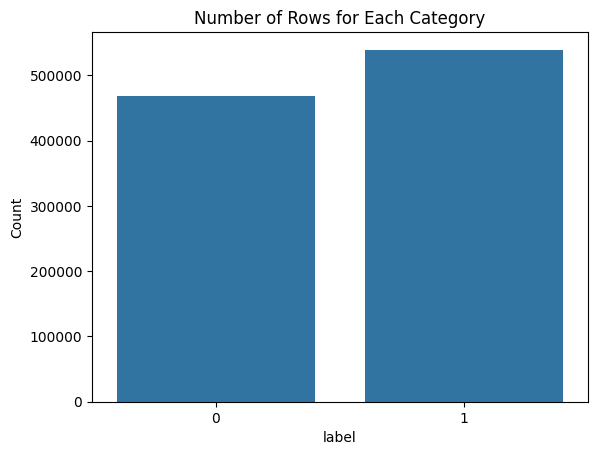

In [32]:
#21
count = mal['label'].value_counts()
sns.barplot(x=count.index, y=count.values)
plt.title('Number of Rows for Each Category')
plt.xlabel('label')
plt.ylabel('Count')
plt.show()

In [33]:
#22
min= mal['label'].value_counts().min()
downsampled_data = mal.groupby('label').apply(lambda x: x.sample(n=min)).reset_index(drop=True)
downsampled_data

proto  service  duration  orig_bytes  resp_bytes  conn_state  history  \
0           2        0  0.000000         0.0         0.0           6        0   
1           2        0  0.000000         0.0         0.0           6        0   
2           2        0  0.000000         0.0         0.0           6        0   
3           2        0  0.000000         0.0         0.0           6        0   
4           1        0  0.000000         0.0         0.0           6        1   
...       ...      ...       ...         ...         ...         ...      ...   
938545      1        0  0.000000         0.0         0.0           6        1   
938546      1        0  2.999069         0.0         0.0           6        1   
938547      1        0  2.998545         0.0         0.0           6        1   
938548      1        0  0.000000         0.0         0.0           6        1   
938549      1        0  0.000000         0.0         0.0           6        1   

        orig_pkts  orig_ip_bytes  resp_pkts  resp_ip_bytes  label  
0             1.0           40.0        0.0            0.0      0  
1             1.0           40.0        0.0            0.0      0  
2             1.0           40.0        0.0            0.0      0  
3             1.0           40.0        0.0            0.0      0  
4             1.0           60.0        0.0            0.0      0  
...           ...            ...        ...            ...    ...  
938545        1.0           60.0        0.0            0.0      1  
938546        3.0          180.0        0.0            0.0      1  
938547        3.0          180.0        0.0            0.0      1  
938548        1.0           60.0        0.0            0.0      1  
938549        1.0           60.0        0.0            0.0      1  

[938550 rows x 12 columns]

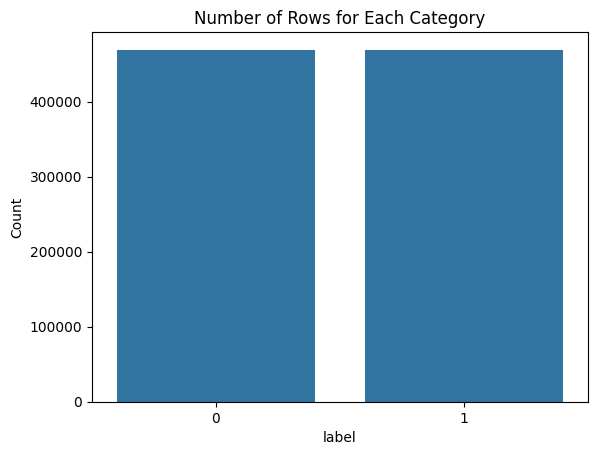

In [34]:
count_upd = downsampled_data['label'].value_counts()
sns.barplot(x=count_upd.index, y=count_upd.values)
plt.title('Number of Rows for Each Category')
plt.xlabel('label')
plt.ylabel('Count')
plt.show()

In [35]:
features=downsampled_data.iloc[:,:-1]
target=downsampled_data['label']
features.dtypes

proto              int64
service            int64
duration         float64
orig_bytes       float64
resp_bytes       float64
conn_state         int64
history            int64
orig_pkts        float64
orig_ip_bytes    float64
resp_pkts        float64
resp_ip_bytes    float64
dtype: object

**PART 3**

In [36]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features,target , test_size=0.3, random_state=42)

# Print the shapes of the resulting sets
print( X_train.shape)
print( X_test.shape)
print( y_train.shape)
print( y_test.shape)

(656985, 11)
(281565, 11)
(656985,)
(281565,)


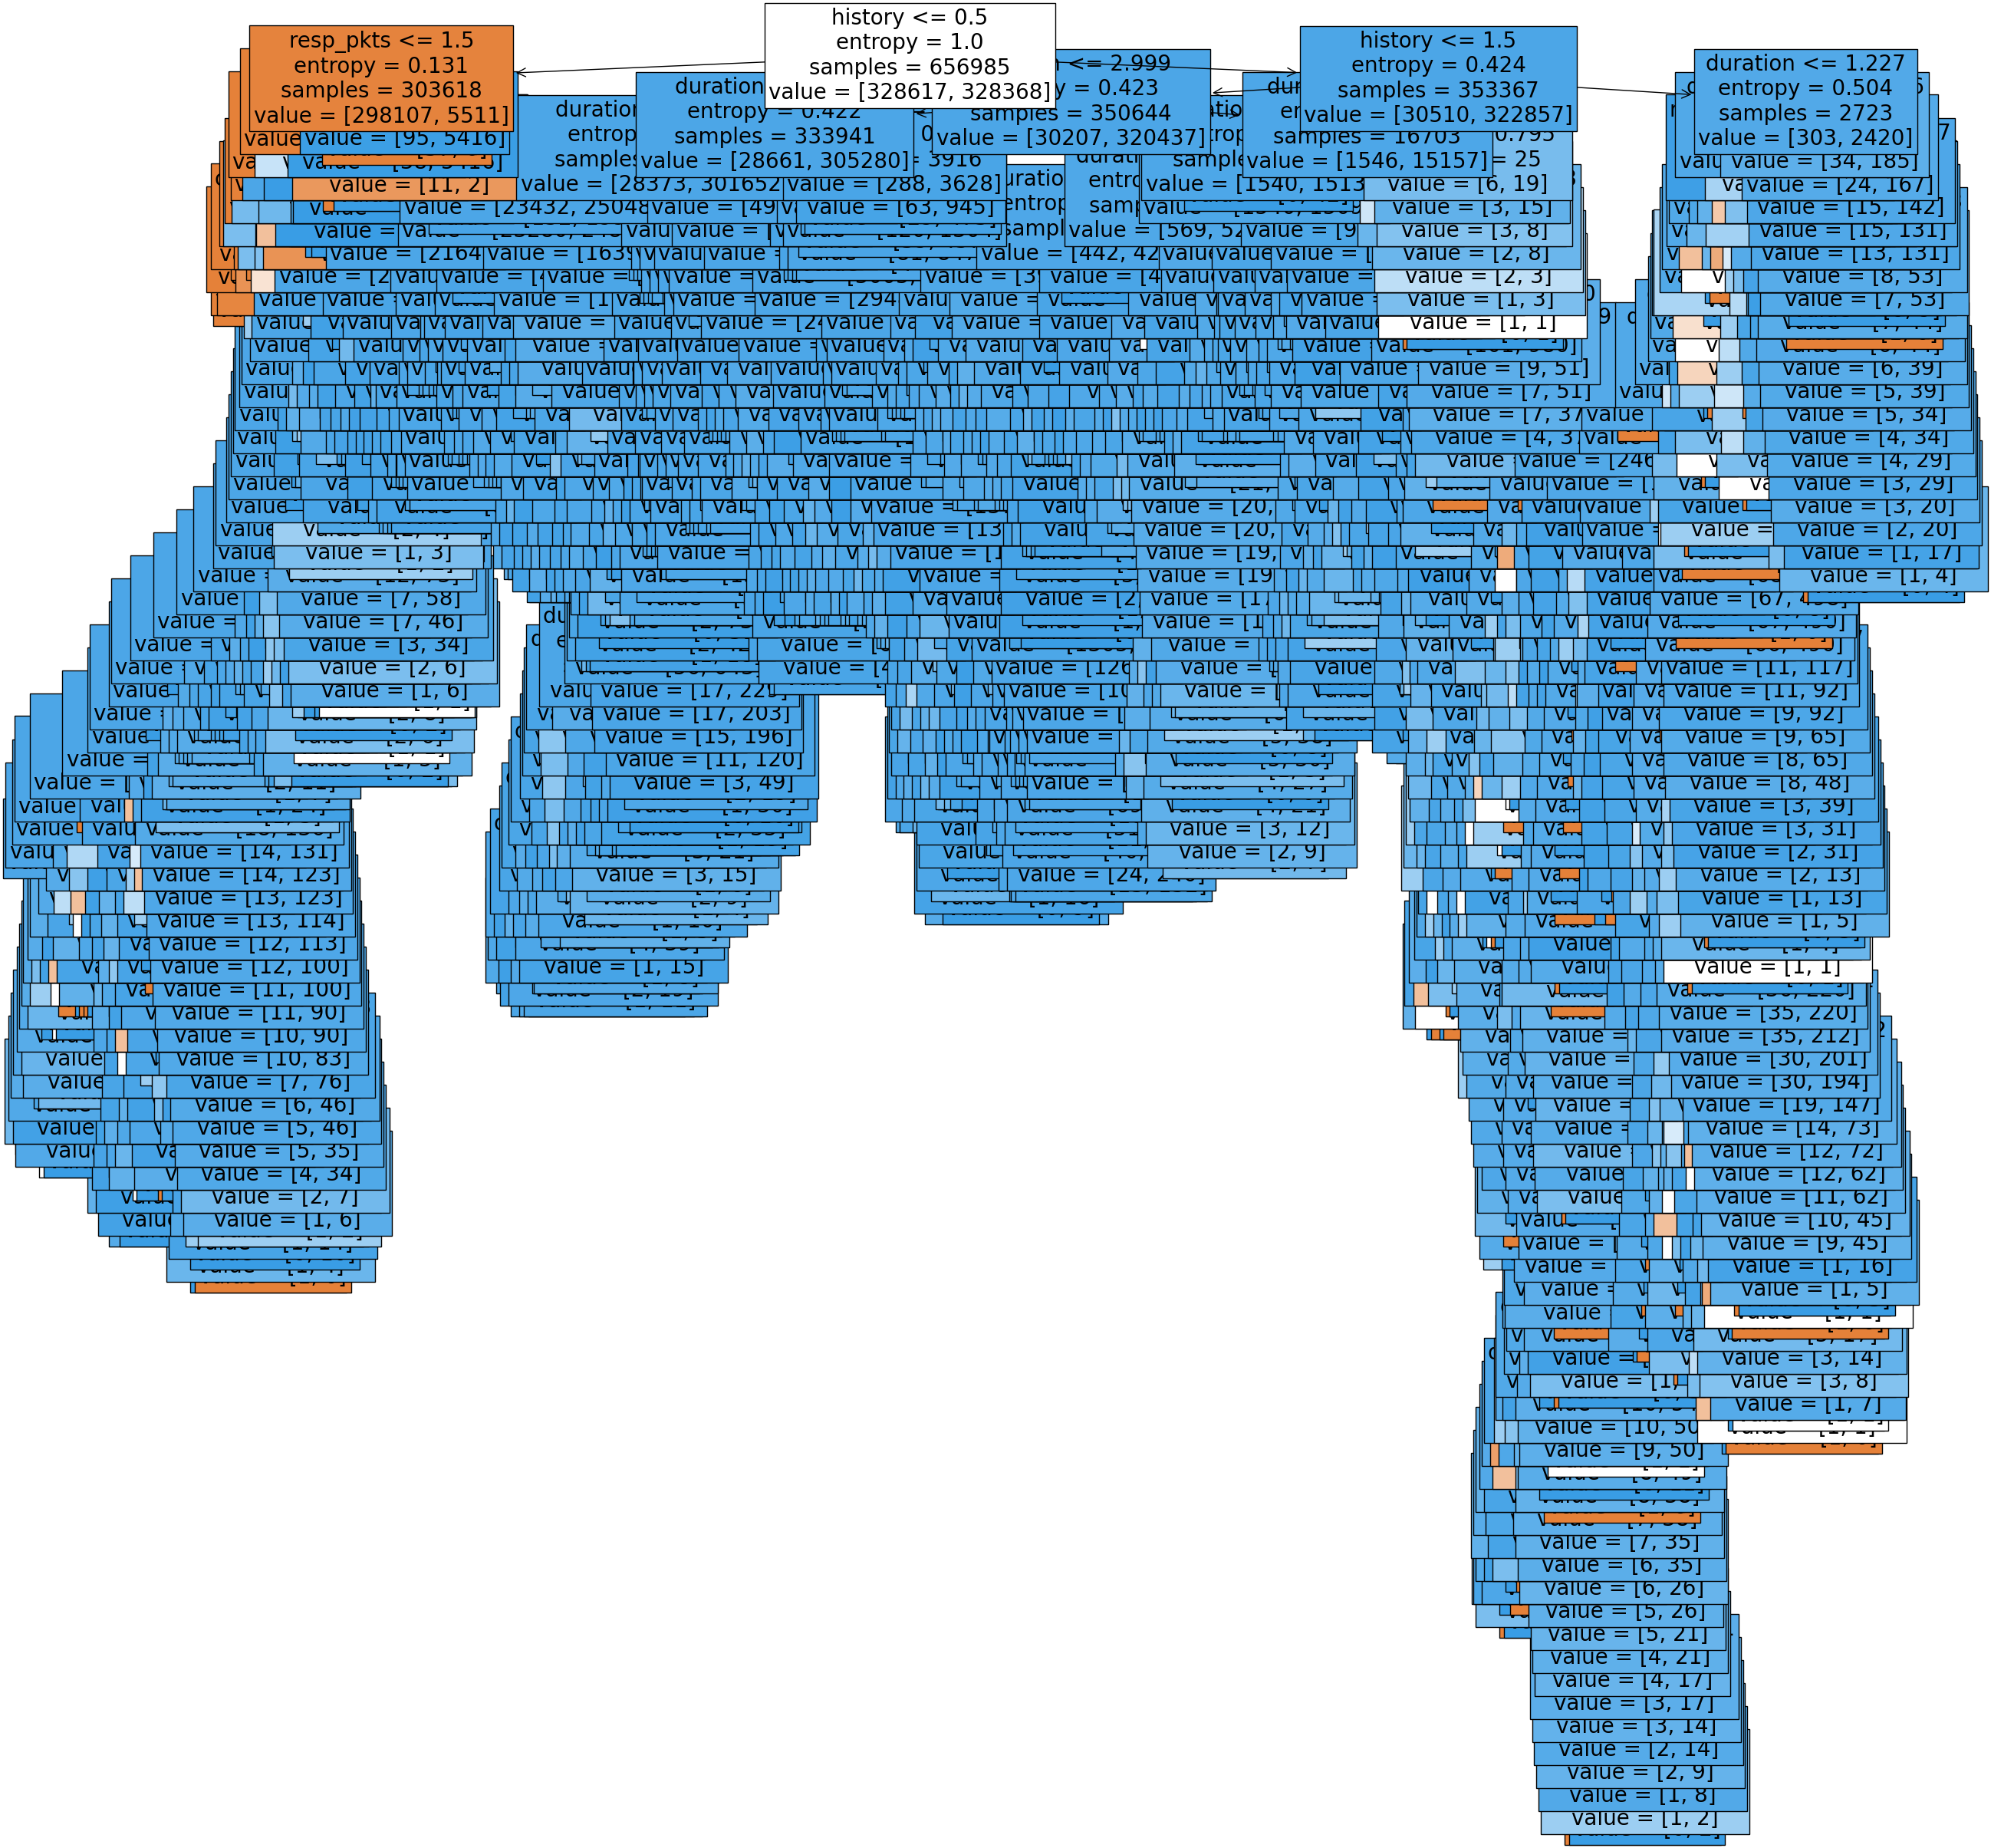

Number of nodes in the decision tree: 3207


In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


clfd = DecisionTreeClassifier(criterion='entropy', random_state=42).fit(X_train,y_train)
plt.figure(figsize=(30,30))
tree.plot_tree(clfd, filled=True, feature_names=features.columns,fontsize=20)
plt.show()

num_nodes = clfd.tree_.node_count
print("Number of nodes in the decision tree:", num_nodes)

[[127757  12901]
 [   198 140709]]


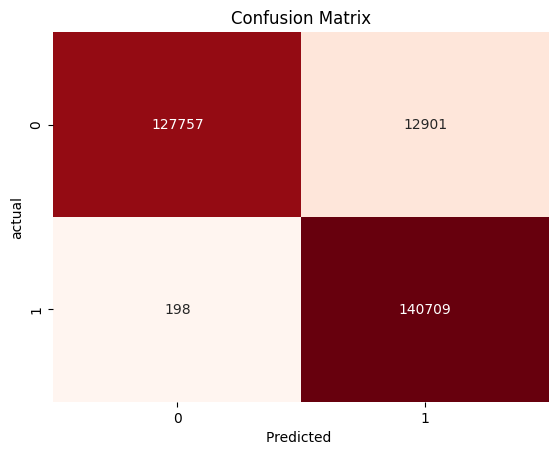

Accuracy: 0.9534778825493225
AUC Score: 0.9536046689563066


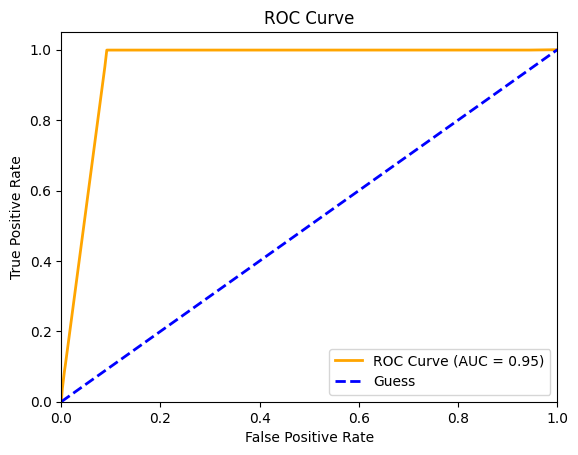

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score
y_pred = clfd.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)


sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted ')
plt.ylabel('actual')
plt.show()


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

y_proba = clfd.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

roc_auc = roc_auc_score(y_test, y_proba)
print("AUC Score:", roc_auc)


plt.plot(fpr, tpr, color='orange', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', lw=2, label='Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [39]:
from sklearn.tree import export_text
tree_rules = export_text(clfd, feature_names=list(X_train.columns))

print("Decision Tree Rules:")
print(tree_rules)

Decision Tree Rules:
|--- history <= 0.50
|   |--- resp_pkts <= 1.50
|   |   |--- orig_pkts <= 8.50
|   |   |   |--- orig_pkts <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- orig_pkts >  0.50
|   |   |   |   |--- conn_state <= 9.50
|   |   |   |   |   |--- duration <= 145.73
|   |   |   |   |   |   |--- duration <= 0.04
|   |   |   |   |   |   |   |--- orig_ip_bytes <= 48.00
|   |   |   |   |   |   |   |   |--- resp_ip_bytes <= 46.00
|   |   |   |   |   |   |   |   |   |--- conn_state <= 5.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- conn_state >  5.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- resp_ip_bytes >  46.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- orig_ip_bytes >  48.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- duration >  0.04
|   |   |   |   |   |   |   |--- orig_bytes <= 24.00
|   |   |   |  

In [40]:
from sklearn.feature_selection import mutual_info_classif


mi = mutual_info_classif(X_train, y_train)
print(mi)

mid = pd.DataFrame({'Feature': X_train.columns, 'Mutual_Information': mi})
mid = mid.sort_values(by='Mutual_Information', ascending=False)
tf = mid.head(2)['Feature'].tolist()
print(tf)

[0.58402221 0.00180549 0.09519448 0.01065746 0.00863197 0.08120943
 0.54231536 0.13117067 0.56085999 0.00597375 0.01193907]
['proto', 'orig_ip_bytes']


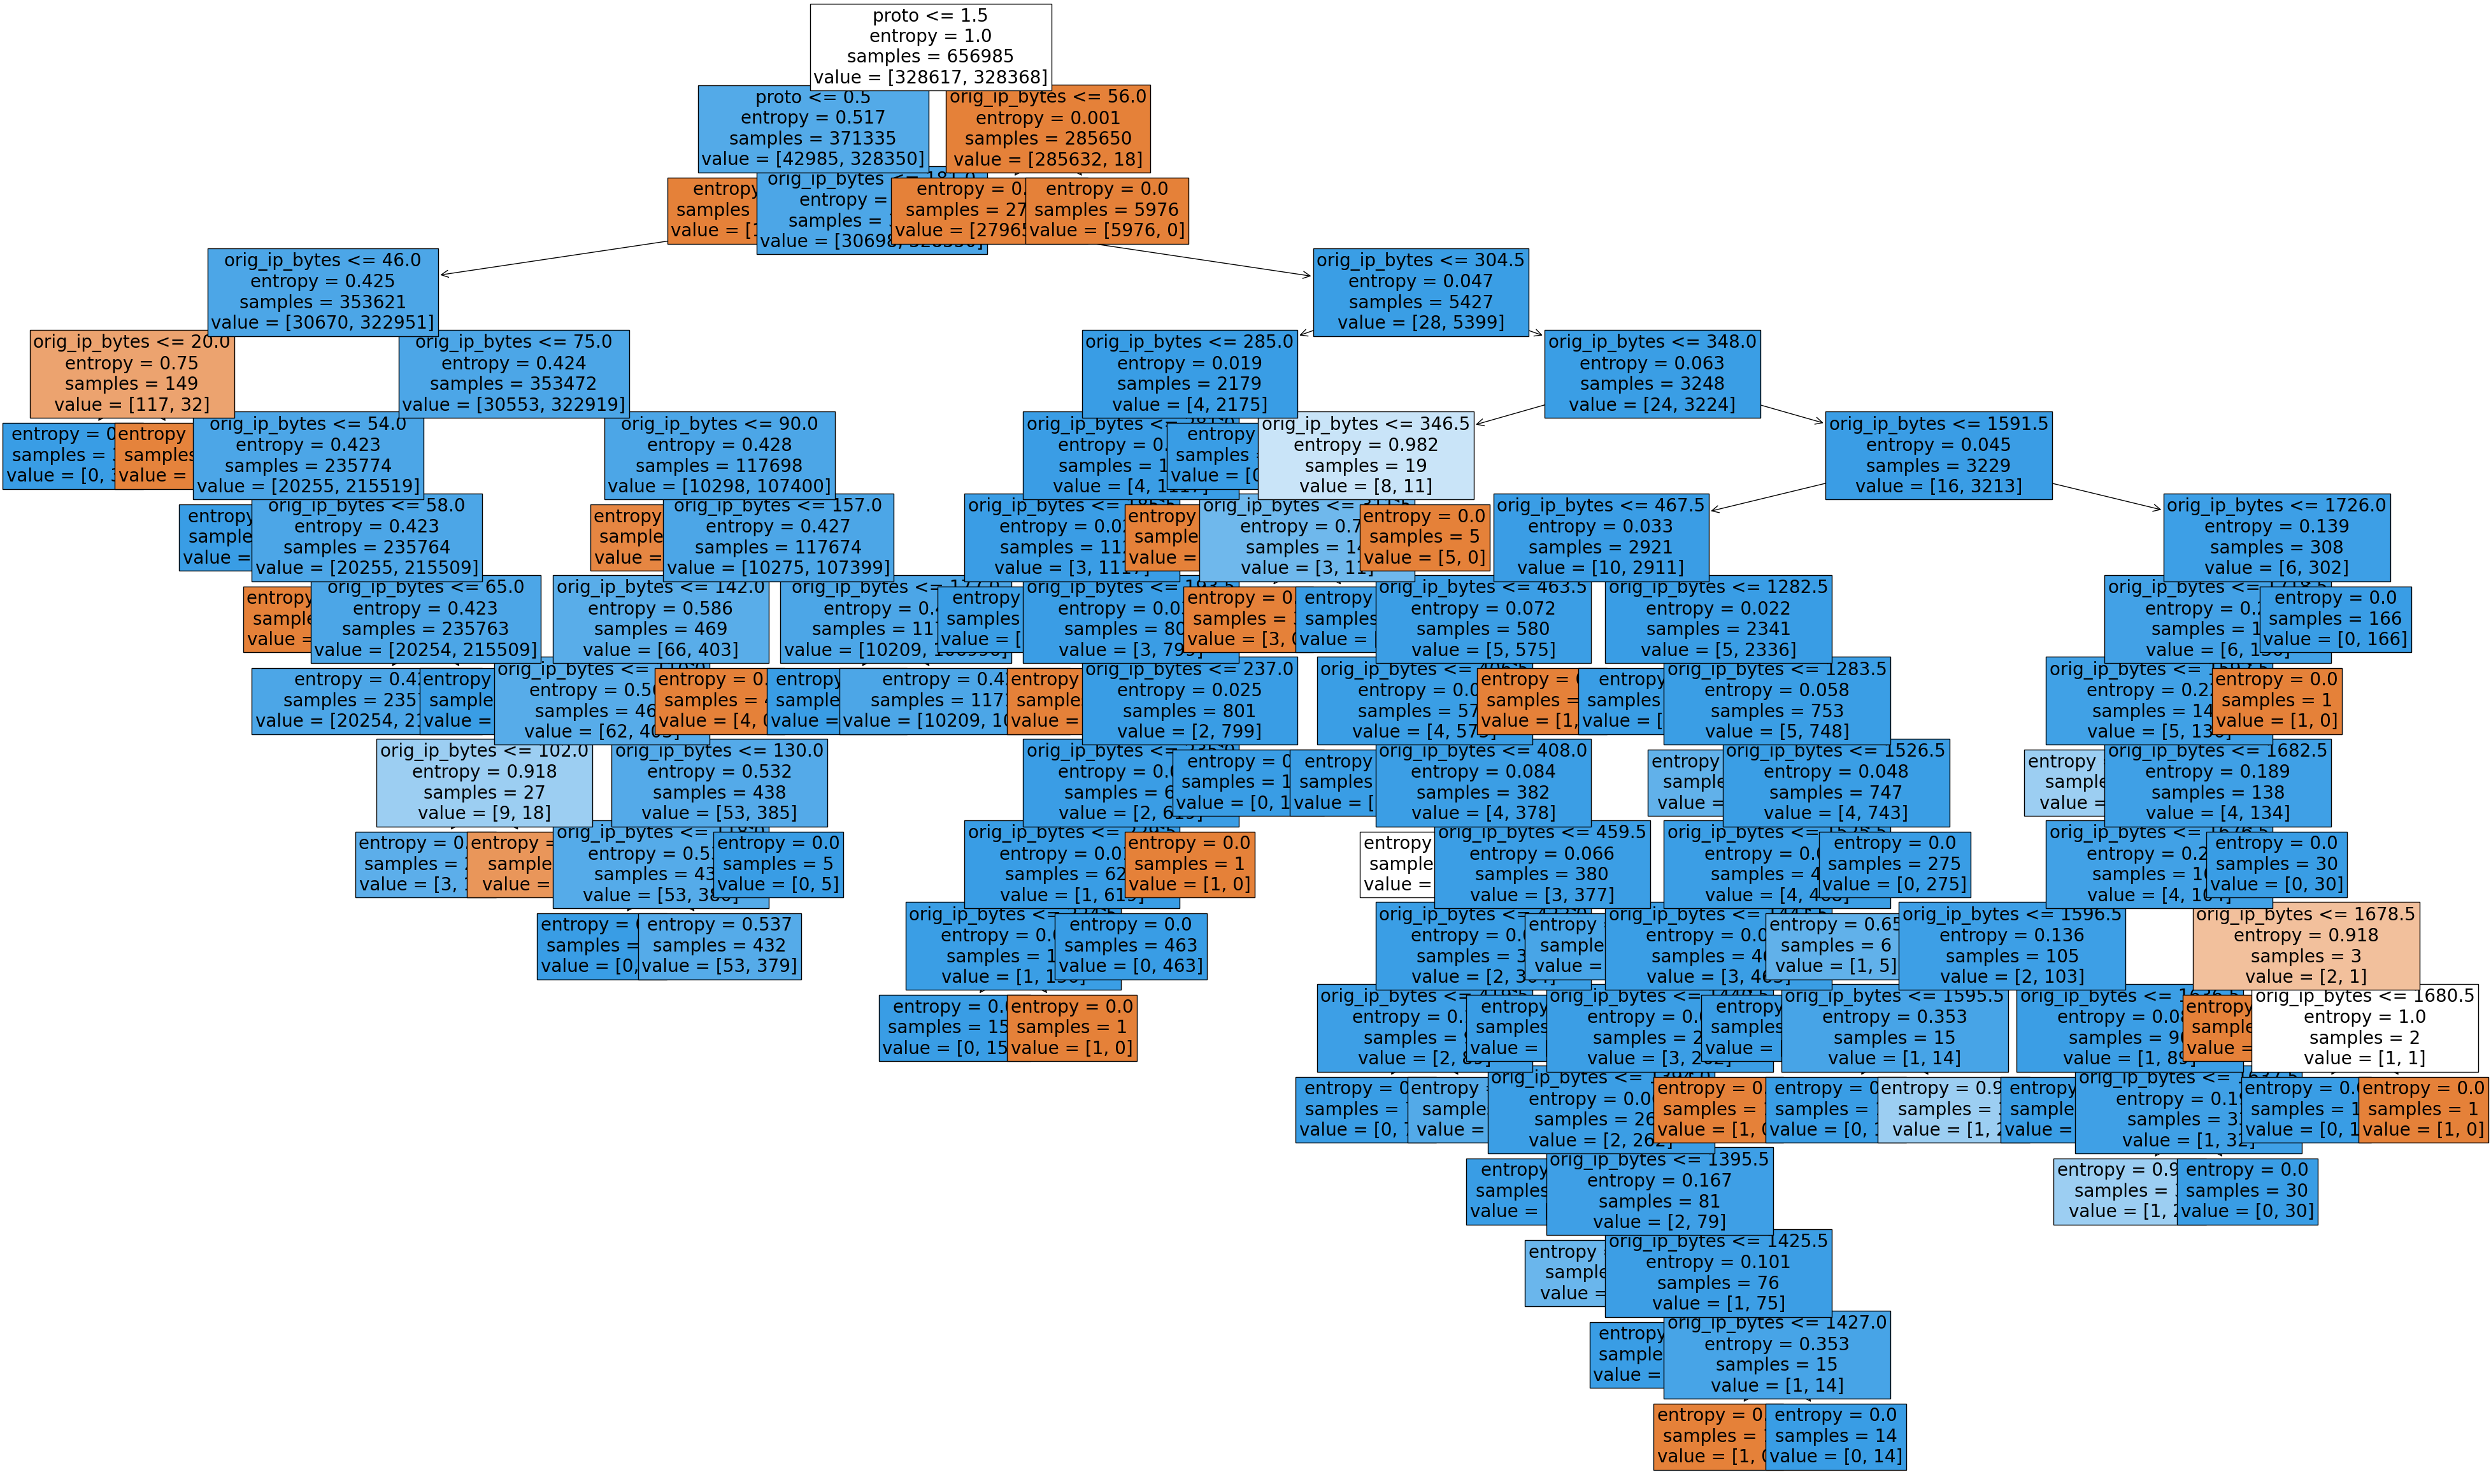

119

In [41]:


clfc = DecisionTreeClassifier(criterion='entropy')
clfc.fit(X_train[tf], y_train)

plt.figure(figsize=(50,30))
tree.plot_tree(clfc, filled=True, feature_names=tf,fontsize=20)
plt.show()
nnf = clfc.tree_.node_count
nnf

[[127719  12939]
 [    18 140889]]


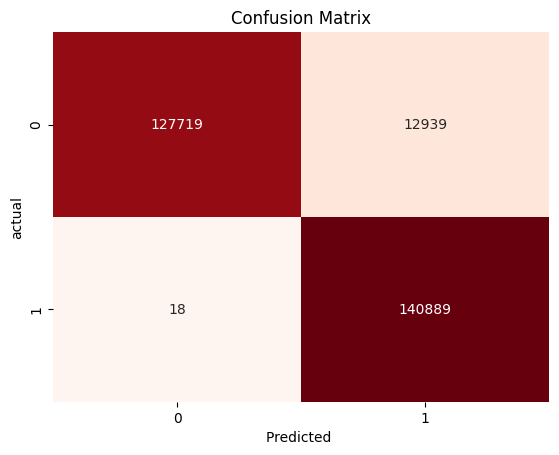

0.95398220659528
0.9542902882487213


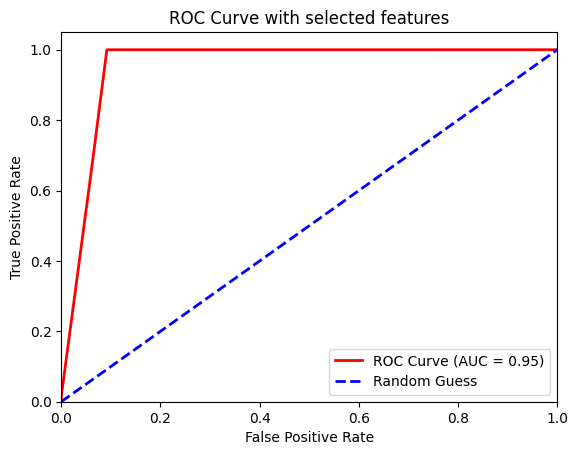

In [42]:
Xts = X_test[tf]

yps = clfc.predict(Xts)

cms = confusion_matrix(y_test, yps)
print(cms)

sns.heatmap(cms, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted ')
plt.ylabel('actual')
plt.show()

accuracys = accuracy_score(y_test, yps)
print(accuracys)
ypos = clfc.predict_proba(Xts)[:, 1]
fpr_selected, tpr_selected, thresholds_selected = roc_curve(y_test, ypos)


roc_aucs = roc_auc_score(y_test, ypos)
print(roc_aucs)

plt.plot(fpr_selected, tpr_selected, color='red', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_aucs)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', lw=2, label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with selected features')
plt.legend(loc='lower right')
plt.show()

In [43]:
tree_r = export_text(clfc, feature_names=tf)
print(tree_r)

|--- proto <= 1.50
|   |--- proto <= 0.50
|   |   |--- class: 0
|   |--- proto >  0.50
|   |   |--- orig_ip_bytes <= 181.00
|   |   |   |--- orig_ip_bytes <= 46.00
|   |   |   |   |--- orig_ip_bytes <= 20.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- orig_ip_bytes >  20.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- orig_ip_bytes >  46.00
|   |   |   |   |--- orig_ip_bytes <= 75.00
|   |   |   |   |   |--- orig_ip_bytes <= 54.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- orig_ip_bytes >  54.00
|   |   |   |   |   |   |--- orig_ip_bytes <= 58.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- orig_ip_bytes >  58.00
|   |   |   |   |   |   |   |--- orig_ip_bytes <= 65.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- orig_ip_bytes >  65.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- orig_ip_bytes >  75.00
|   |   |   |   |   |--- orig_ip_bytes <= 90.00
|   |   |   |   |   

**GINI INDEX**

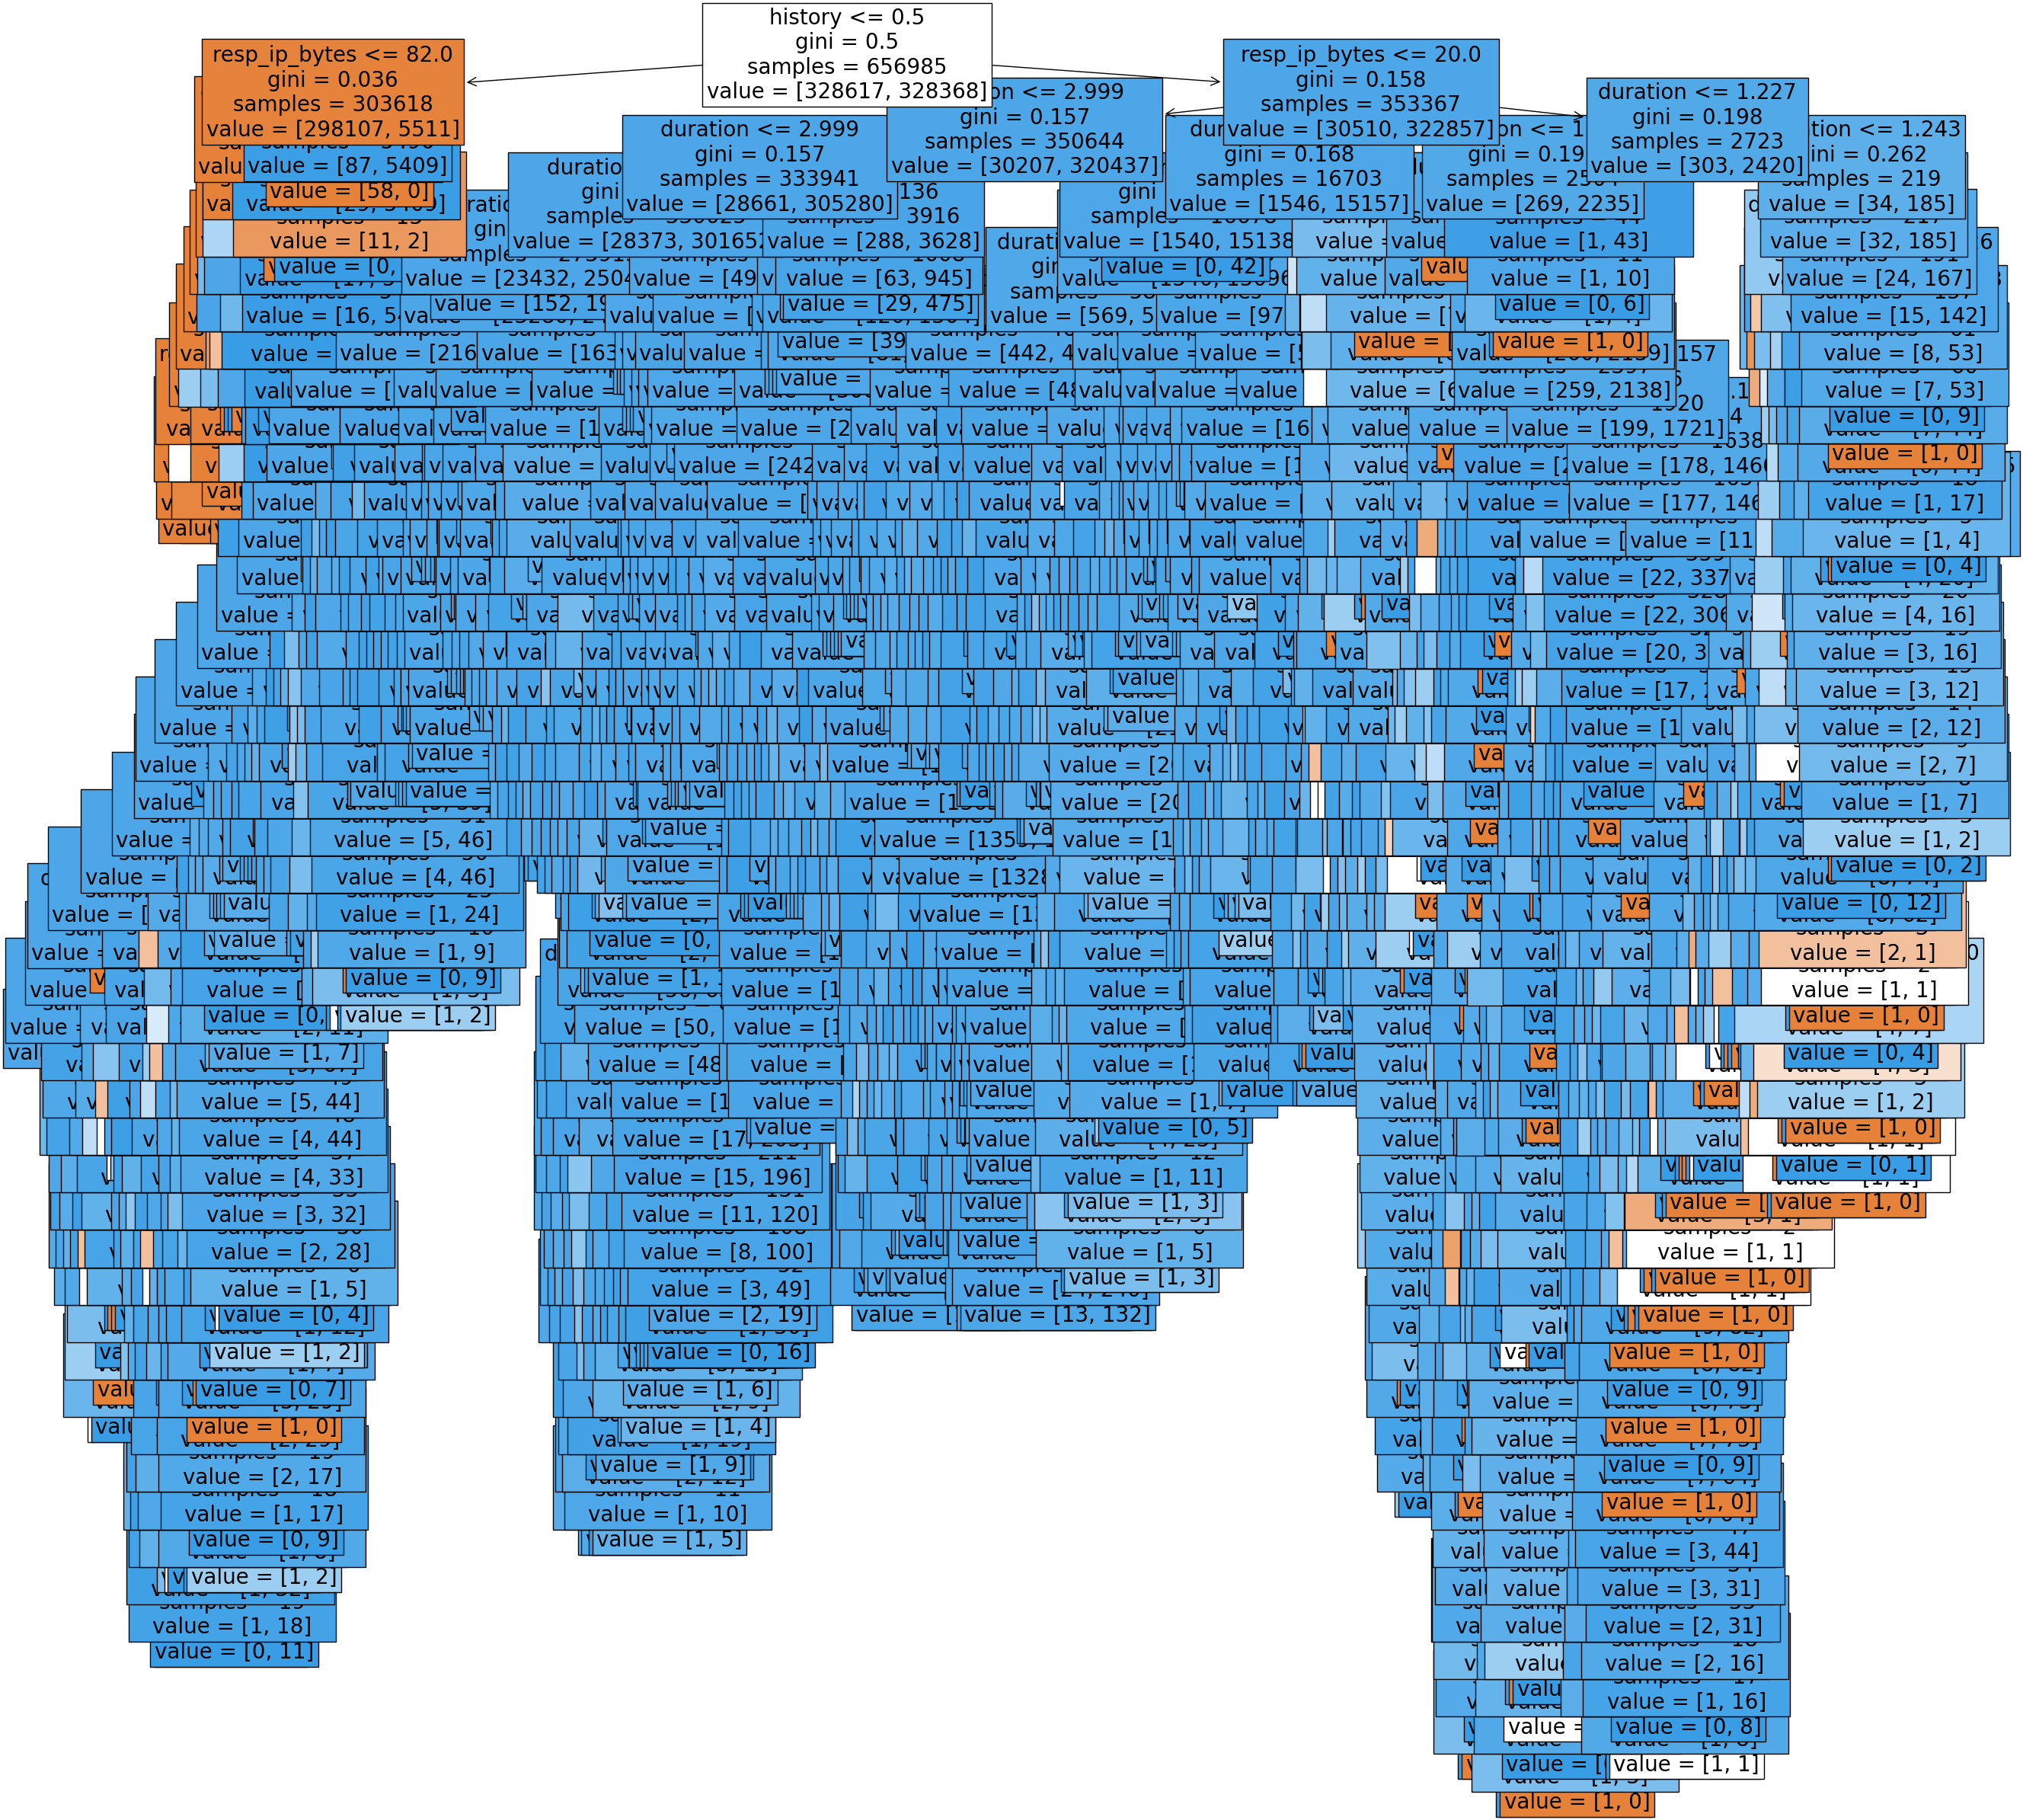

Number of nodes in the decision tree: 3225


In [44]:

clfg = DecisionTreeClassifier(criterion='gini', random_state=43).fit(X_train,y_train)
plt.figure(figsize=(30,30))
tree.plot_tree(clfg, filled=True, feature_names=features.columns,fontsize=20)
plt.show()

num_nodg = clfg.tree_.node_count
print("Number of nodes in the decision tree:", num_nodg)

[[127757  12901]
 [   200 140707]]


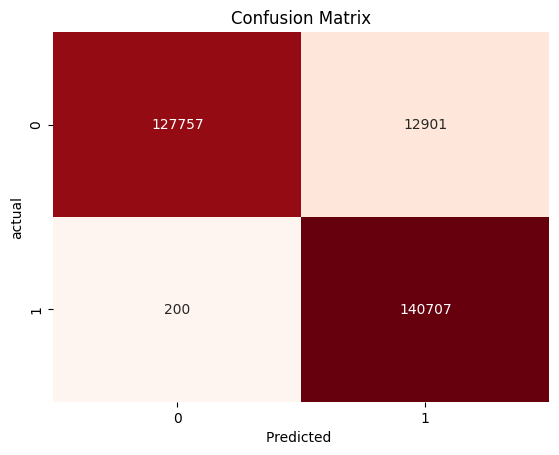

Accuracy: 0.9534707793937457
AUC Score: 0.9536046689563066


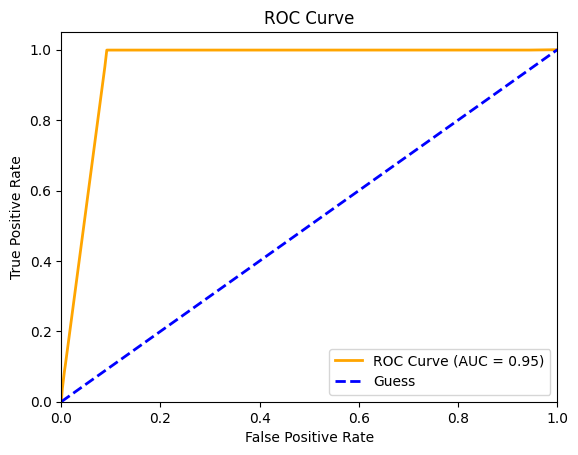

In [45]:
y_pred = clfg.predict(X_test)
cmg = confusion_matrix(y_test, y_pred)
print(cmg)


sns.heatmap(cmg, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted ')
plt.ylabel('actual')
plt.show()


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

y_probag = clfd.predict_proba(X_test)[:, 1]
fprg, tprg, thresholdg = roc_curve(y_test, y_probag)

roc_aucg = roc_auc_score(y_test, y_probag)
print("AUC Score:", roc_auc)


plt.plot(fprg, tprg, color='orange', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_aucg)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', lw=2, label='Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [46]:
tree_ruleg = export_text(clfg, feature_names=list(X_train.columns))
print(tree_ruleg)

|--- history <= 0.50
|   |--- resp_ip_bytes <= 82.00
|   |   |--- orig_ip_bytes <= 20.00
|   |   |   |--- class: 1
|   |   |--- orig_ip_bytes >  20.00
|   |   |   |--- orig_pkts <= 9.50
|   |   |   |   |--- conn_state <= 9.50
|   |   |   |   |   |--- duration <= 145.73
|   |   |   |   |   |   |--- resp_pkts <= 1.50
|   |   |   |   |   |   |   |--- orig_pkts <= 8.50
|   |   |   |   |   |   |   |   |--- duration <= 0.04
|   |   |   |   |   |   |   |   |   |--- resp_ip_bytes <= 46.00
|   |   |   |   |   |   |   |   |   |   |--- orig_ip_bytes <= 48.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- orig_ip_bytes >  48.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- resp_ip_bytes >  46.00
|   |   |   |   |   |   |   |   |   |   |--- resp_bytes <= 22.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- resp_bytes 

In [47]:
mig = mutual_info_classif(X_train, y_train)
print(mig)

midg = pd.DataFrame({'Feature': X_train.columns, 'Mutual_Information': mig})
midg = midg.sort_values(by='Mutual_Information', ascending=False)
tfg = mid.head(2)['Feature'].tolist()
print(tfg)

[0.58418542 0.00252869 0.09570488 0.01126054 0.00993728 0.0806018
 0.54228851 0.13070621 0.56094334 0.00680042 0.01135502]
['proto', 'orig_ip_bytes']


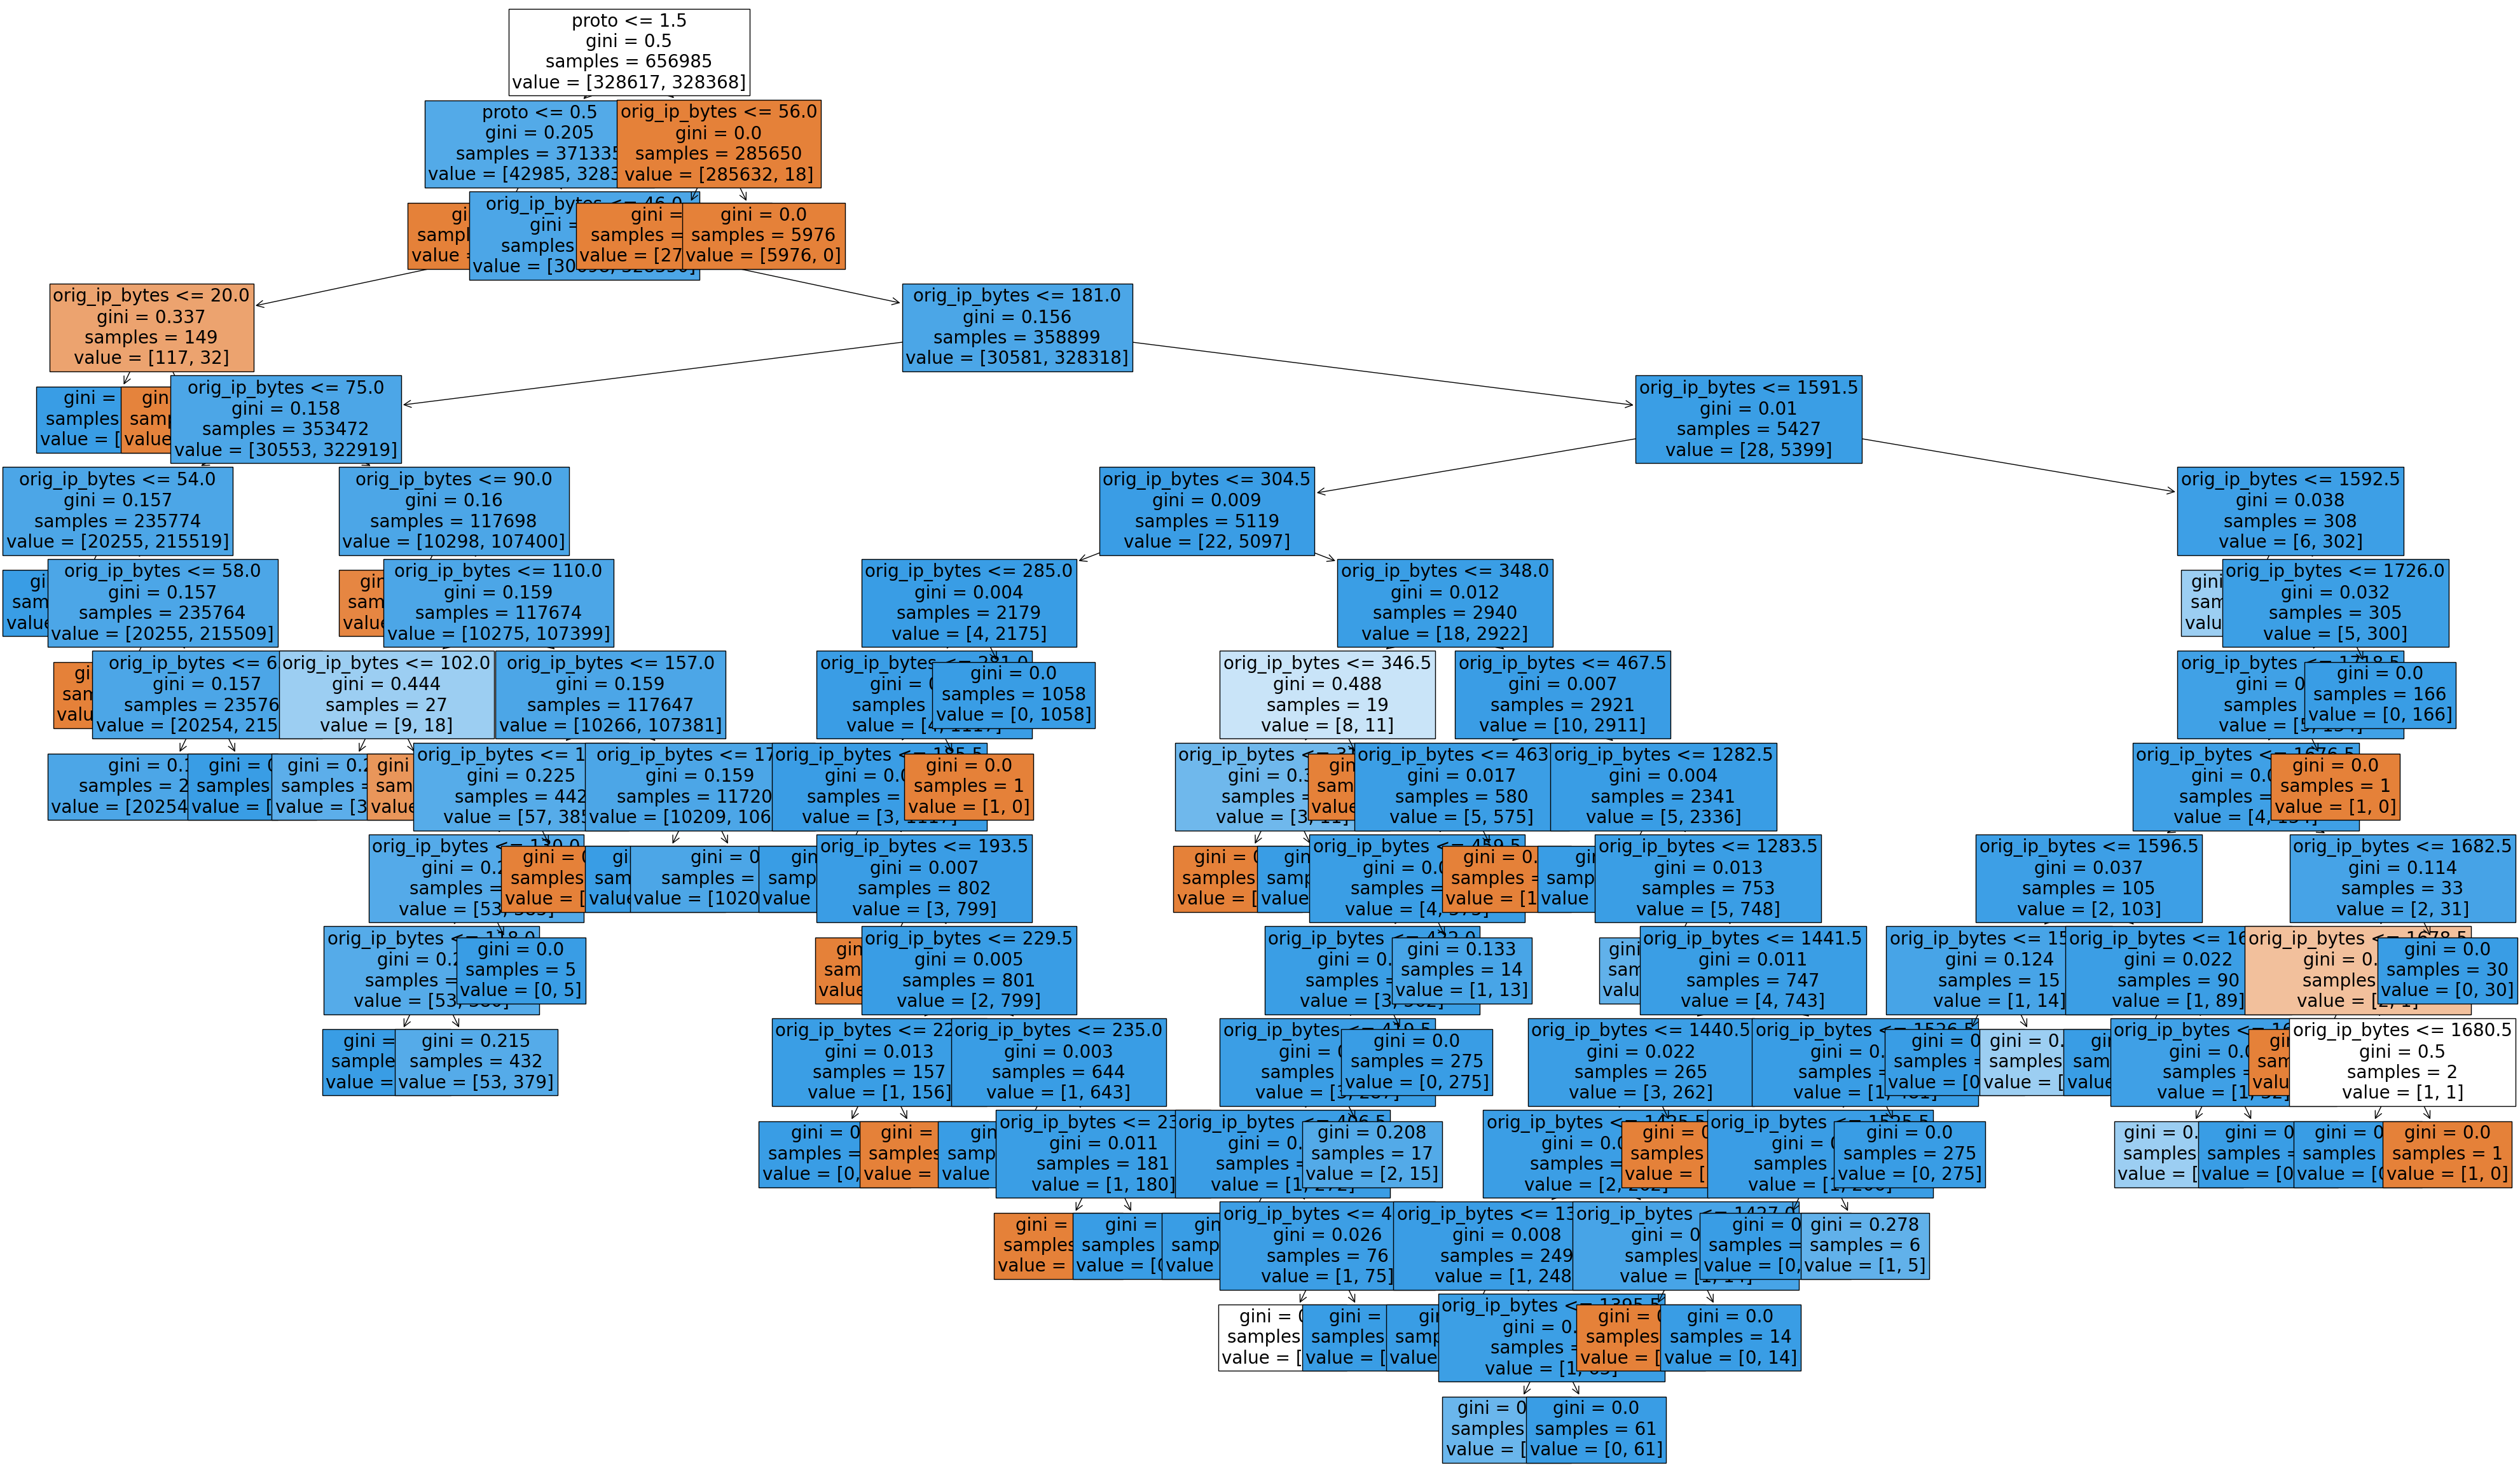

119

In [48]:
clfgc = DecisionTreeClassifier(criterion='gini')
clfgc.fit(X_train[tfg], y_train)

plt.figure(figsize=(50,30))
tree.plot_tree(clfgc, filled=True, feature_names=tfg,fontsize=20)
plt.show()
nnfg = clfgc.tree_.node_count
nnfg

[[127719  12939]
 [    18 140889]]


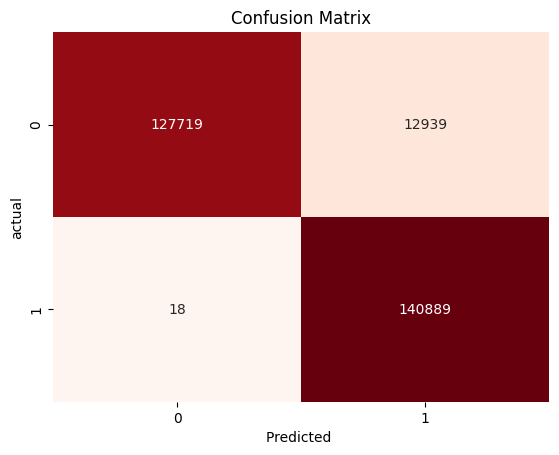

0.95398220659528
0.9542902882487213


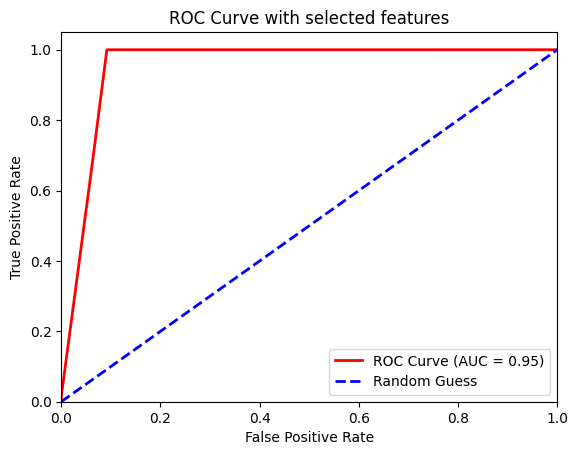

In [49]:
Xtgs = X_test[tf]

ypgs = clfc.predict(Xtgs)

cmgs = confusion_matrix(y_test, ypgs)
print(cmgs)

sns.heatmap(cmgs, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted ')
plt.ylabel('actual')
plt.show()

accuracyg = accuracy_score(y_test, ypgs)
print(accuracyg)
ypogs = clfc.predict_proba(Xtgs)[:, 1]
fprg, tprg, thresholdsg = roc_curve(y_test, ypogs)


roc_aucg = roc_auc_score(y_test, ypogs)
print(roc_aucg)

plt.plot(fprg, tprg, color='red', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_aucg)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', lw=2, label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with selected features')
plt.legend(loc='lower right')
plt.show()

In [50]:
tree_rg= export_text(clfc, feature_names=tfg)
print(tree_rg)

|--- proto <= 1.50
|   |--- proto <= 0.50
|   |   |--- class: 0
|   |--- proto >  0.50
|   |   |--- orig_ip_bytes <= 181.00
|   |   |   |--- orig_ip_bytes <= 46.00
|   |   |   |   |--- orig_ip_bytes <= 20.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- orig_ip_bytes >  20.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- orig_ip_bytes >  46.00
|   |   |   |   |--- orig_ip_bytes <= 75.00
|   |   |   |   |   |--- orig_ip_bytes <= 54.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- orig_ip_bytes >  54.00
|   |   |   |   |   |   |--- orig_ip_bytes <= 58.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- orig_ip_bytes >  58.00
|   |   |   |   |   |   |   |--- orig_ip_bytes <= 65.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- orig_ip_bytes >  65.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- orig_ip_bytes >  75.00
|   |   |   |   |   |--- orig_ip_bytes <= 90.00
|   |   |   |   |   